# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# modelling for ensemble method
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# visualization purpose
import matplotlib.pyplot as plt

# Data Loading

In [2]:
daun_singkong_lbp_df = pd.read_csv('../dataset/Fitur_LBPuniform_Cassava Leaf.csv', header=None, na_values=np.nan)
daun_singkong_lbp_df = daun_singkong_lbp_df.copy().sample(5000)
# dataset splitting 
X, y = daun_singkong_lbp_df.drop([26], axis=1), daun_singkong_lbp_df[26]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
15247,6322,3343,3330,2586,1895,1657,1513,1457,1570,1848,...,1967,2036,2083,2134,2326,2782,3038,2825,7800,49721
12453,7576,3999,3093,2266,1689,1480,1269,1272,1342,1390,...,1509,1530,1546,1724,1984,2383,3074,3381,7428,57298
5411,6536,3291,2742,2181,1796,1631,1630,1688,1718,1901,...,1712,1715,1594,1788,2019,2260,2961,3196,6502,51132
19642,8702,4810,2839,1784,1266,987,911,893,851,966,...,1013,1036,1095,1331,1577,2103,2906,4271,7803,64950
14672,6526,3040,2853,2612,2327,2259,2019,2058,2183,2396,...,2169,2164,2136,2205,2366,2574,2666,2659,6218,45309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12978,8521,4889,2938,1707,1253,1030,819,880,844,937,...,840,874,942,1147,1416,2017,2838,4289,8520,66382
6981,7833,4586,2512,1544,1188,1029,946,988,1008,1138,...,1309,1269,1178,1332,1435,1783,2651,3946,7069,64008
3999,8763,5227,2682,1583,1129,858,812,759,734,763,...,780,906,892,1230,1479,2016,3006,4411,8708,67281
17755,6127,3498,2333,1804,1504,1478,1348,1432,1756,2061,...,2265,2172,2044,2184,2237,2364,2485,2771,5684,49373


In [4]:
y

15247    4
12453    3
5411     1
19642    3
14672    3
        ..
12978    3
6981     1
3999     3
17755    4
12050    2
Name: 26, Length: 5000, dtype: int64

# Defining Global Variables 

In [5]:
kfold = StratifiedKFold(n_splits=5, random_state=45, shuffle=True)

# Data Preprocessing

## Data Normalization
***
Using Min-Max Scaler

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train

array([[0.79099556, 0.71256875, 0.736733  , ..., 0.70590691, 0.25998558,
        0.79234018],
       [0.42105263, 0.36708087, 0.67661692, ..., 0.39094135, 0.20682528,
        0.45727219],
       [0.6972733 , 0.62904869, 0.6907131 , ..., 0.54998956, 0.24595049,
        0.70449644],
       ...,
       [0.63322765, 0.61825219, 0.48217247, ..., 0.6779378 , 0.19591444,
        0.77949065],
       [0.65478757, 0.5013241 , 0.83001658, ..., 0.50260906, 0.20586398,
        0.61004081],
       [0.53785669, 0.33958036, 0.65671642, ..., 0.3414736 , 0.17159337,
        0.44670385]])

## Label Encoding Target
***

In [8]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Modelling

## Create Stacking ML Ensemble from 5-fold cross-validation

In [9]:
ensemble_classifiers = {
    'svm' : dict(),
    'logreg': dict(),
    'naive_bayes': dict(),
    'decision_tree': dict()
}

for idx, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    
    # split training set into train and val set
    X_latih, X_validasi = X_train[train_index], X_train[val_index]
    y_latih, y_validasi = y_train[train_index], y_train[val_index]
    
    # train 5 model of SVM
    svm = SVC()
    svm.fit(X_latih, y_latih)
    predicted_svm = svm.predict(X_validasi)
    
    ensemble_classifiers['svm']['model-'+str(idx+1)] = {
        'train':svm,
        'validation': accuracy_score(y_validasi, predicted_svm)
    }
    
    # train 5 model of Naive Bayes
    naive_bayes = MultinomialNB()
    naive_bayes.fit(X_latih, y_latih)
    predicted_naive_bayes = naive_bayes.predict(X_validasi)
    
    ensemble_classifiers['naive_bayes']['model-'+str(idx+1)] = {
        'train':naive_bayes,
        'validation': accuracy_score(y_validasi, predicted_naive_bayes)
    }
    
    # train 5 model of Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_latih, y_latih)
    predicted_decision_tree = decision_tree.predict(X_validasi)
    
    ensemble_classifiers['decision_tree']['model-'+str(idx+1)] = {
        'train':decision_tree,
        'validation': accuracy_score(y_validasi, predicted_decision_tree)
    }
    
    # train 5 model of logReg
    log_reg = LogisticRegression(solver='newton-cg')
    log_reg.fit(X_latih, y_latih)
    predicted_log_reg = log_reg.predict(X_validasi)
    
    ensemble_classifiers['logreg']['model-'+str(idx+1)] = {
        'train':log_reg,
        'validation': accuracy_score(y_validasi, predicted_log_reg)
    }

In [10]:
ensemble_classifiers

{'svm': {'model-1': {'train': SVC(), 'validation': 0.61},
  'model-2': {'train': SVC(), 'validation': 0.6171428571428571},
  'model-3': {'train': SVC(), 'validation': 0.6142857142857143},
  'model-4': {'train': SVC(), 'validation': 0.6142857142857143},
  'model-5': {'train': SVC(), 'validation': 0.6157142857142858}},
 'logreg': {'model-1': {'train': LogisticRegression(solver='newton-cg'),
   'validation': 0.6114285714285714},
  'model-2': {'train': LogisticRegression(solver='newton-cg'),
   'validation': 0.6242857142857143},
  'model-3': {'train': LogisticRegression(solver='newton-cg'),
   'validation': 0.6357142857142857},
  'model-4': {'train': LogisticRegression(solver='newton-cg'),
   'validation': 0.6142857142857143},
  'model-5': {'train': LogisticRegression(solver='newton-cg'),
   'validation': 0.6157142857142858}},
 'naive_bayes': {'model-1': {'train': MultinomialNB(),
   'validation': 0.6128571428571429},
  'model-2': {'train': MultinomialNB(), 'validation': 0.6114285714285714

## Training the stacking ensemble ML

In [11]:
all_predicted_results = dict()
list_of_majority_voting_each_models = list()

for model_name, models in ensemble_classifiers.items():
    print("\t\t\t", model_name.upper())
    
    # voting scenario for data training input prepration for ANN model
    if len(models)!=0:
        all_predicted_results[model_name] = dict()
        for sub_model_name, dict_models in models.items():
            print('\t\t Training Model {} using {}'.format(model_name.upper(), sub_model_name))
            all_predicted_results[model_name][sub_model_name] = dict_models['train'].predict(X_train)
        
        # make dataframe for 5 model prediction results on X_train and get the mode label for that 5 prediction
        model_df_voting = pd.DataFrame(all_predicted_results[model_name]).mode(axis=1)[0]
        model_df_voting.columns = ['majority_vote_from_'+model_name]
        list_of_majority_voting_each_models.append(model_df_voting)

			 SVM
		 Training Model SVM using model-1
		 Training Model SVM using model-2
		 Training Model SVM using model-3
		 Training Model SVM using model-4
		 Training Model SVM using model-5
			 LOGREG
		 Training Model LOGREG using model-1
		 Training Model LOGREG using model-2
		 Training Model LOGREG using model-3
		 Training Model LOGREG using model-4
		 Training Model LOGREG using model-5
			 NAIVE_BAYES
		 Training Model NAIVE_BAYES using model-1
		 Training Model NAIVE_BAYES using model-2
		 Training Model NAIVE_BAYES using model-3
		 Training Model NAIVE_BAYES using model-4
		 Training Model NAIVE_BAYES using model-5
			 DECISION_TREE
		 Training Model DECISION_TREE using model-1
		 Training Model DECISION_TREE using model-2
		 Training Model DECISION_TREE using model-3
		 Training Model DECISION_TREE using model-4
		 Training Model DECISION_TREE using model-5


In [12]:
new_input_training_features = pd.concat(list_of_majority_voting_each_models, axis=1)
new_input_training_features['ground_truth'] = y_train.copy()

In [13]:
new_input_training_features

,0,0,0,0,ground_truth
0,3.0,3.0,3,3,3
1,3.0,3.0,3,1,1
2,3.0,3.0,3,3,3
3,3.0,3.0,3,3,3
4,3.0,3.0,3,1,1
...,...,...,...,...,...
3495,3.0,3.0,3,4,4
3496,3.0,3.0,3,3,3
3497,3.0,3.0,3,4,4
3498,3.0,3.0,3,3,3


## Feed New Input features into ANN

In [14]:
# split X and y from new_input_features before feeding to ANN
new_X_train, new_y_train = new_input_training_features.drop(['ground_truth'],axis=1), new_input_training_features['ground_truth']
# new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=45)

# feed new X and new y into ANN
ann_model = MLPClassifier(max_iter=400)
ann_model.fit(new_X_train, new_y_train)

predicted_ann_train = ann_model.predict(new_X_train)

In [15]:
accuracy_score(new_y_train, predicted_ann_train)

0.9994285714285714

# Testing Model

In [16]:
all_predicted_results = dict()
list_of_majority_voting_each_models = list()

for model_name, models in ensemble_classifiers.items():
    print("\t\t\t", model_name.upper())
    
    # voting scenario for data testing input prepration for ANN model
    if len(models)!=0:
        all_predicted_results[model_name] = dict()
        for sub_model_name, dict_models in models.items():
            print('\t\t Testing Model {} using {}'.format(model_name.upper(), sub_model_name))
            
            all_predicted_results[model_name][sub_model_name] = dict_models['train'].predict(X_test)
        
        # make dataframe for 5 model prediction results on X_test and get the mode label for that 5 prediction
        model_df_voting = pd.DataFrame(all_predicted_results[model_name]).mode(axis=1)[0]
        model_df_voting.columns = ['majority_vote_from_'+model_name]
        list_of_majority_voting_each_models.append(model_df_voting)

			 SVM
		 Testing Model SVM using model-1
		 Testing Model SVM using model-2
		 Testing Model SVM using model-3
		 Testing Model SVM using model-4
		 Testing Model SVM using model-5
			 LOGREG
		 Testing Model LOGREG using model-1
		 Testing Model LOGREG using model-2
		 Testing Model LOGREG using model-3
		 Testing Model LOGREG using model-4
		 Testing Model LOGREG using model-5
			 NAIVE_BAYES
		 Testing Model NAIVE_BAYES using model-1
		 Testing Model NAIVE_BAYES using model-2
		 Testing Model NAIVE_BAYES using model-3
		 Testing Model NAIVE_BAYES using model-4
		 Testing Model NAIVE_BAYES using model-5
			 DECISION_TREE
		 Testing Model DECISION_TREE using model-1
		 Testing Model DECISION_TREE using model-2
		 Testing Model DECISION_TREE using model-3
		 Testing Model DECISION_TREE using model-4
		 Testing Model DECISION_TREE using model-5


In [17]:
new_input_testing_features = pd.concat(list_of_majority_voting_each_models, axis=1)
new_input_testing_features['ground_truth'] = y_test.copy()

In [18]:
new_input_testing_features

,0,0,0,0,ground_truth
0,3.0,3.0,3,4.0,4
1,3.0,3.0,3,4.0,3
2,3.0,3.0,3,3.0,2
3,3.0,3.0,3,3.0,3
4,3.0,3.0,3,3.0,3
...,...,...,...,...,...
1495,3.0,3.0,3,3.0,3
1496,3.0,3.0,3,3.0,3
1497,3.0,1.0,3,2.0,1
1498,3.0,3.0,3,3.0,3


In [19]:
# split X and y from new_input_features before feeding to ANN
new_X_test, new_y_test = new_input_testing_features.drop(['ground_truth'],axis=1), new_input_testing_features['ground_truth']

# predict new X test using pre-trained ANN before
predicted_ann_testing = ann_model.predict(new_X_test)

In [20]:
accuracy_score(new_y_test, predicted_ann_testing)

0.5566666666666666

In [21]:
print(classification_report(new_y_test, predicted_ann_testing))

              precision    recall  f1-score   support

           0       0.12      0.15      0.13        68
           1       0.21      0.18      0.20       163
           2       0.17      0.13      0.14       150
           3       0.71      0.78      0.74       950
           4       0.30      0.19      0.23       169

    accuracy                           0.56      1500
   macro avg       0.30      0.29      0.29      1500
weighted avg       0.53      0.56      0.54      1500



<Figure size 1008x576 with 0 Axes>

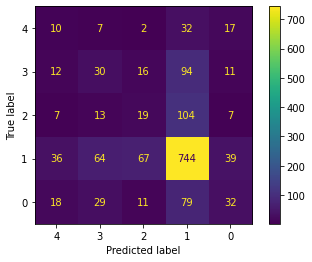

In [22]:
cm = confusion_matrix(new_y_test, predicted_ann_testing)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=new_y_test.unique())
plt.figure(figsize=(14,8))
disp.plot()
plt.show()

In [23]:
print(cm)

[[ 10   7   2  32  17]
 [ 12  30  16  94  11]
 [  7  13  19 104   7]
 [ 36  64  67 744  39]
 [ 18  29  11  79  32]]
